In [37]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Načítanie údajov z datasetu

In [14]:
first_dataset="data/product.csv"
products = pd.read_csv(first_dataset, sep='\t')
second_dataset="data/session.csv"
sessions = pd.read_csv(second_dataset, sep='\t')
third_dataset="data/user.csv"
users = pd.read_csv(third_dataset, sep='\t')
merged_data = sessions.merge(users, on="user_id", how="inner")

,session_duration,wild_mouse_duration,pct_scroll_move,product_ean,pct_doubleclick,user_id,pct_mouse_click,pct_mouse_move,pct_wild_mouse,pct_click_product_info,...,scroll_move_total_rel_distance,page_activity_duration,session_id,pct_input,pct_scrandom,pct_rage_click,ack,pct_scroll_move_duration,pct_click,total_load_time
count,11056.000000,11045.000000,11039.000000,1.105600e+04,11046.000000,11056.000000,11040.000000,11049.000000,11040.000000,11049.000000,...,11046.000000,11042.000000,1.105600e+04,11043.000000,11047.000000,11048.000000,11056.000000,11041.000000,11046.000000,11056.000000
mean,150.467382,9.805012,48.935279,4.960105e+12,10.734719,1238.887934,9.776228,11.467664,48.778380,50.762786,...,8.119029,9.793796,7.405894e+05,2.771959,45.091489,46.076893,0.550289,9.776658,9.515877,3.965176
std,59.628264,0.984939,12.822585,2.901883e+12,1.967824,717.086763,0.992071,1.262666,12.598544,13.509270,...,1.362547,2.097071,4.342434e+05,3.529599,12.558816,12.389753,0.497487,2.211294,2.423480,2.865161
min,-59.005100,6.472690,5.498970,1.598952e+09,3.033820,2.000000,6.321670,6.751140,2.593610,0.000000,...,2.946530,3.249020,1.028000e+03,0.000000,0.000000,0.000000,0.000000,4.023980,0.000000,0.016440
25%,110.134535,9.134640,40.361260,2.413946e+12,9.598785,611.000000,9.110938,10.662400,40.568060,41.582840,...,7.226435,8.133672,3.664112e+05,0.865700,36.476495,37.804125,0.000000,8.030190,7.623520,1.885002
50%,149.057510,9.804170,48.758460,4.995787e+12,11.008600,1243.000000,9.770360,11.457840,48.649110,50.803110,...,8.133700,9.800740,7.363930e+05,1.695170,44.886930,46.055220,1.000000,9.400080,10.314460,3.325990
75%,190.828158,10.476460,57.562060,7.457241e+12,12.122170,1868.250000,10.436085,12.272760,57.305060,59.949130,...,9.017245,11.478510,1.113740e+06,3.337180,53.475595,54.381827,1.000000,11.440960,11.409165,5.341110
max,374.243660,13.671530,100.000000,9.994133e+12,16.495640,2497.000000,13.051840,16.626850,100.000000,97.130530,...,13.005680,16.775090,1.499995e+06,81.820260,88.768790,100.000000,1.000000,17.119270,15.448980,24.872660


In [ ]:
clean of missing values

# Odstráňovanie vychýlených hodnôt

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11056 entries, 0 to 11055
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   session_duration                11056 non-null  float64
 1   wild_mouse_duration             11045 non-null  float64
 2   pct_scroll_move                 11039 non-null  float64
 3   screen_width                    11056 non-null  object 
 4   product_ean                     11056 non-null  int64  
 5   pct_doubleclick                 11046 non-null  float64
 6   browser_name                    11056 non-null  object 
 7   user_id                         11056 non-null  int64  
 8   pct_mouse_click                 11040 non-null  float64
 9   pct_mouse_move                  11049 non-null  float64
 10  pct_wild_mouse                  11040 non-null  float64
 11  pct_click_product_info          11049 non-null  float64
 12  mouse_move_total_rel_distance   

C:\Users\User\AppData\Local\Temp\ipykernel_8908\346937668.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  merged_data.hist(ax = ax, color="red")


array([[<Axes: title={'center': 'session_duration'}>,
        <Axes: title={'center': 'wild_mouse_duration'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'product_ean'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'pct_click_product_info'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'session_id'}>,
        <Axes: title={'center': 'pct_input'}>],
       [<Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct

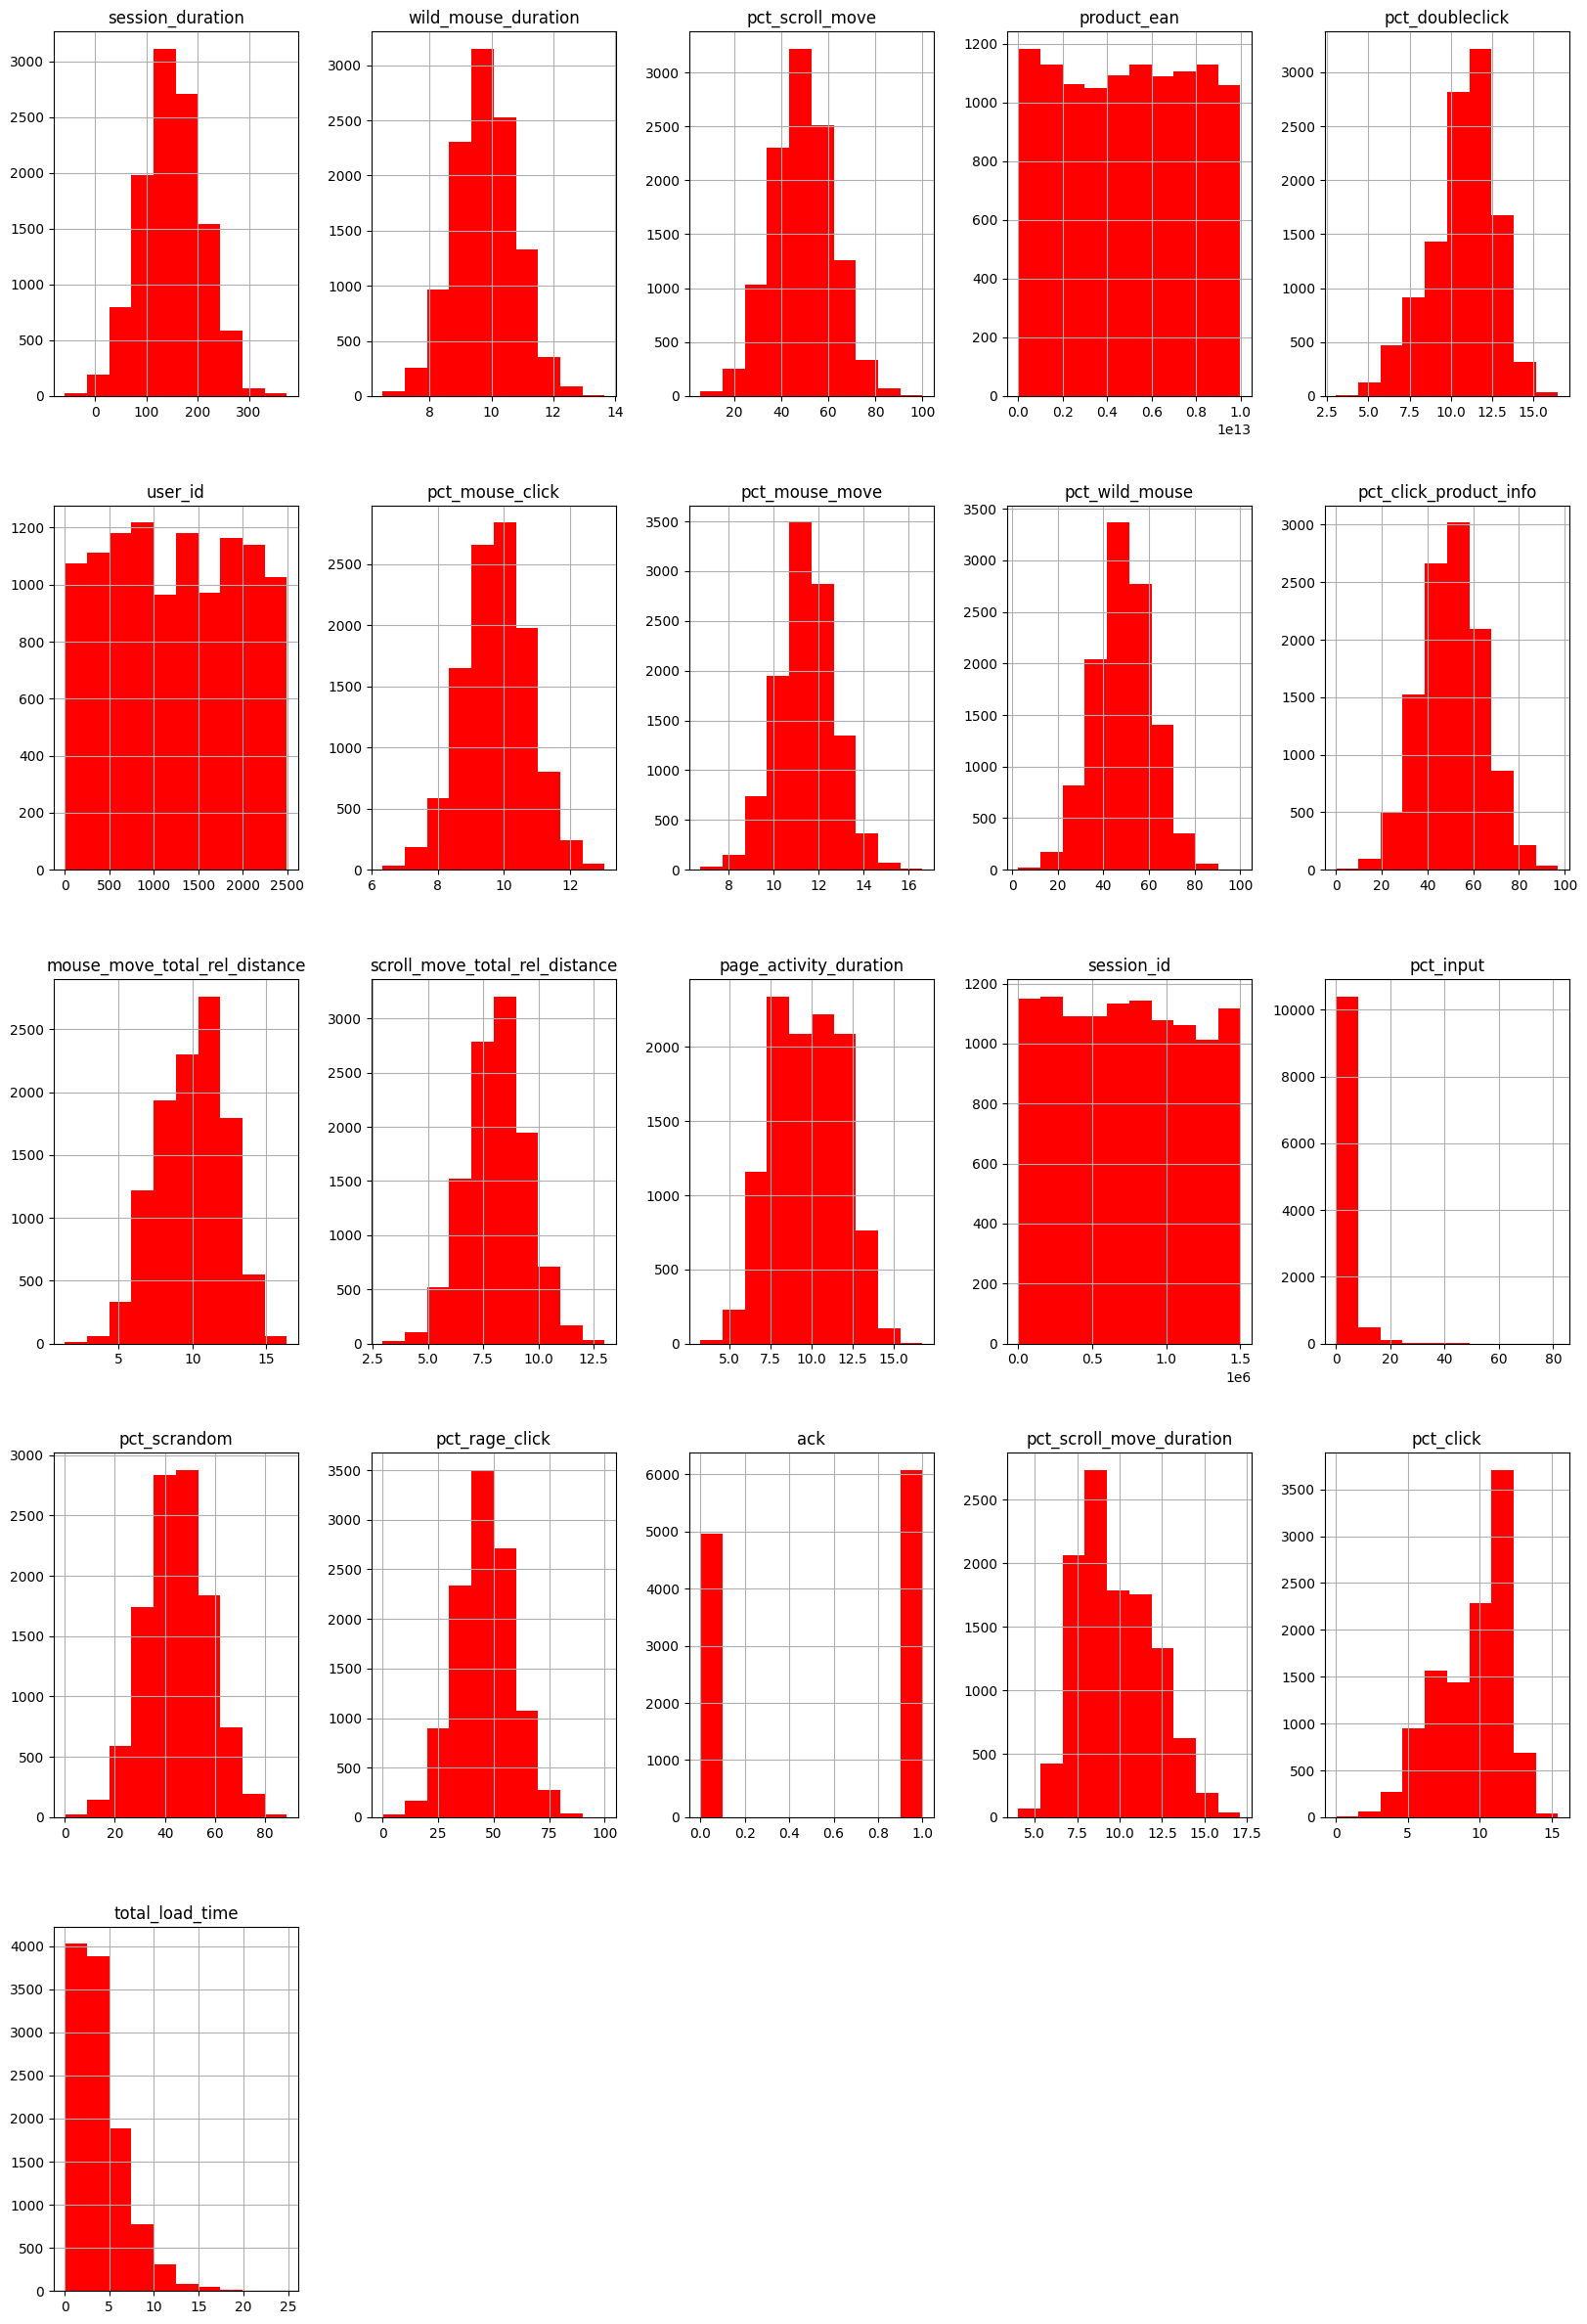

In [29]:
fig = plt.figure(figsize = (20,30))
ax = fig.gca()
merged_data.hist(ax = ax, color="red")

Vidíme, že máme vel'a vychýlených hodnôt, preto tento problém vyriešime spôsobom odstránenia vychýlených (odľahlých) pozorovaní (prvý spôsob) a nahradenia vychýlenej hodnoty hraničnými hodnotami rozdelenia (5% a 95%)

In [42]:
columns= ['session_duration','wild_mouse_duration','pct_scroll_move', 'product_ean', 'user_id','pct_mouse_click','pct_mouse_move','pct_wild_mouse', 'pct_click_product_info' ,'mouse_move_total_rel_distance', 'scroll_move_total_rel_distance','page_activity_duration','session_id','pct_input','pct_scrandom','pct_rage_click','ack','pct_scroll_move_duration','pct_click','total_load_time']
for column_name in columns:
    lower_limit = merged_data[column_name].quantile(0.05)
    upper_limit = merged_data[column_name].quantile(0.95)

    filtered_data_first = merged_data[(merged_data[column_name] >= lower_limit) & (merged_data[column_name] <= upper_limit)]

C:\Users\User\AppData\Local\Temp\ipykernel_8908\491447311.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  filtered_data_first.hist(ax = ax, color="red")


array([[<Axes: title={'center': 'session_duration'}>,
        <Axes: title={'center': 'wild_mouse_duration'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'product_ean'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'pct_click_product_info'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'session_id'}>,
        <Axes: title={'center': 'pct_input'}>],
       [<Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct

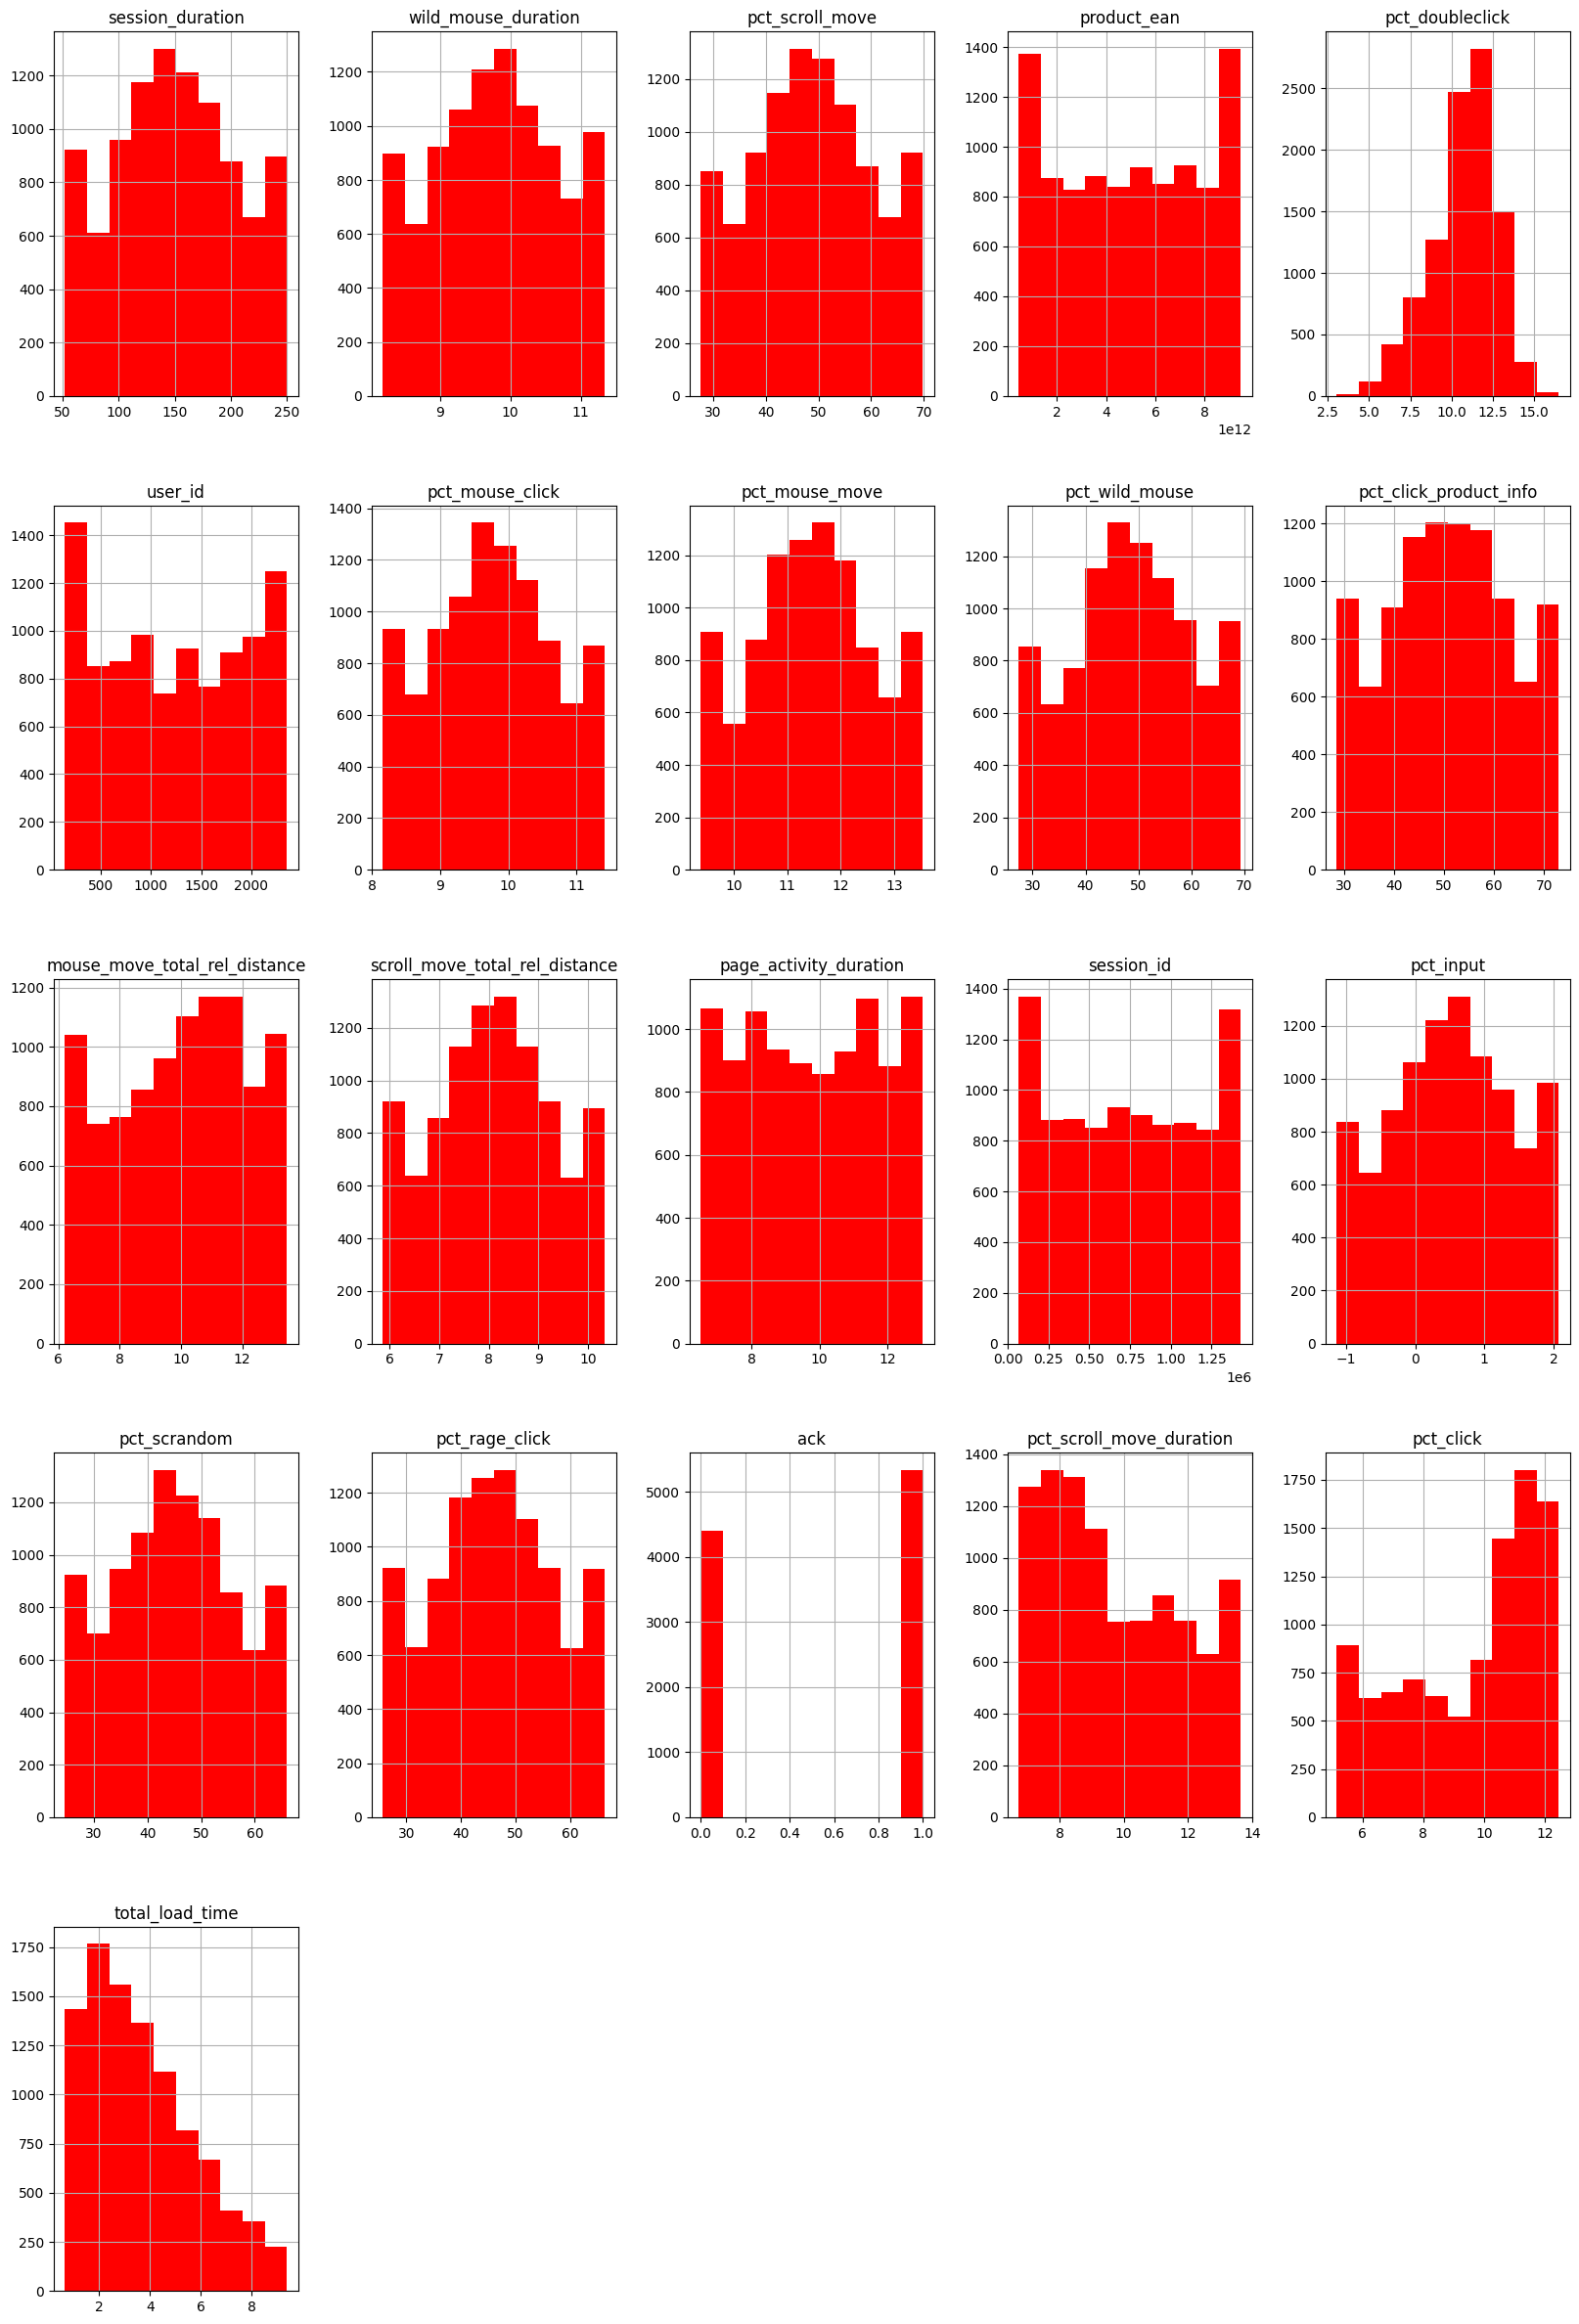

In [43]:
fig = plt.figure(figsize = (20,30))
ax = fig.gca()
filtered_data_first.hist(ax = ax, color="red")

In [41]:
columns= ['session_duration','wild_mouse_duration','pct_scroll_move', 'product_ean', 'user_id','pct_mouse_click','pct_mouse_move','pct_wild_mouse', 'pct_click_product_info' ,'mouse_move_total_rel_distance', 'scroll_move_total_rel_distance','page_activity_duration','session_id','pct_input','pct_scrandom','pct_rage_click','ack','pct_scroll_move_duration','pct_click','total_load_time']
for column_name in columns:
    lower_limit = merged_data[column_name].quantile(0.05)
    upper_limit = merged_data[column_name].quantile(0.95)
    
    merged_data[column_name] = np.where(merged_data[column_name] < lower_limit, lower_limit, merged_data[column_name])
    merged_data[column_name] = np.where(merged_data[column_name] > upper_limit, upper_limit, merged_data[column_name])

C:\Users\User\AppData\Local\Temp\ipykernel_8908\346937668.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  merged_data.hist(ax = ax, color="red")


array([[<Axes: title={'center': 'session_duration'}>,
        <Axes: title={'center': 'wild_mouse_duration'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'product_ean'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'pct_click_product_info'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'session_id'}>,
        <Axes: title={'center': 'pct_input'}>],
       [<Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct

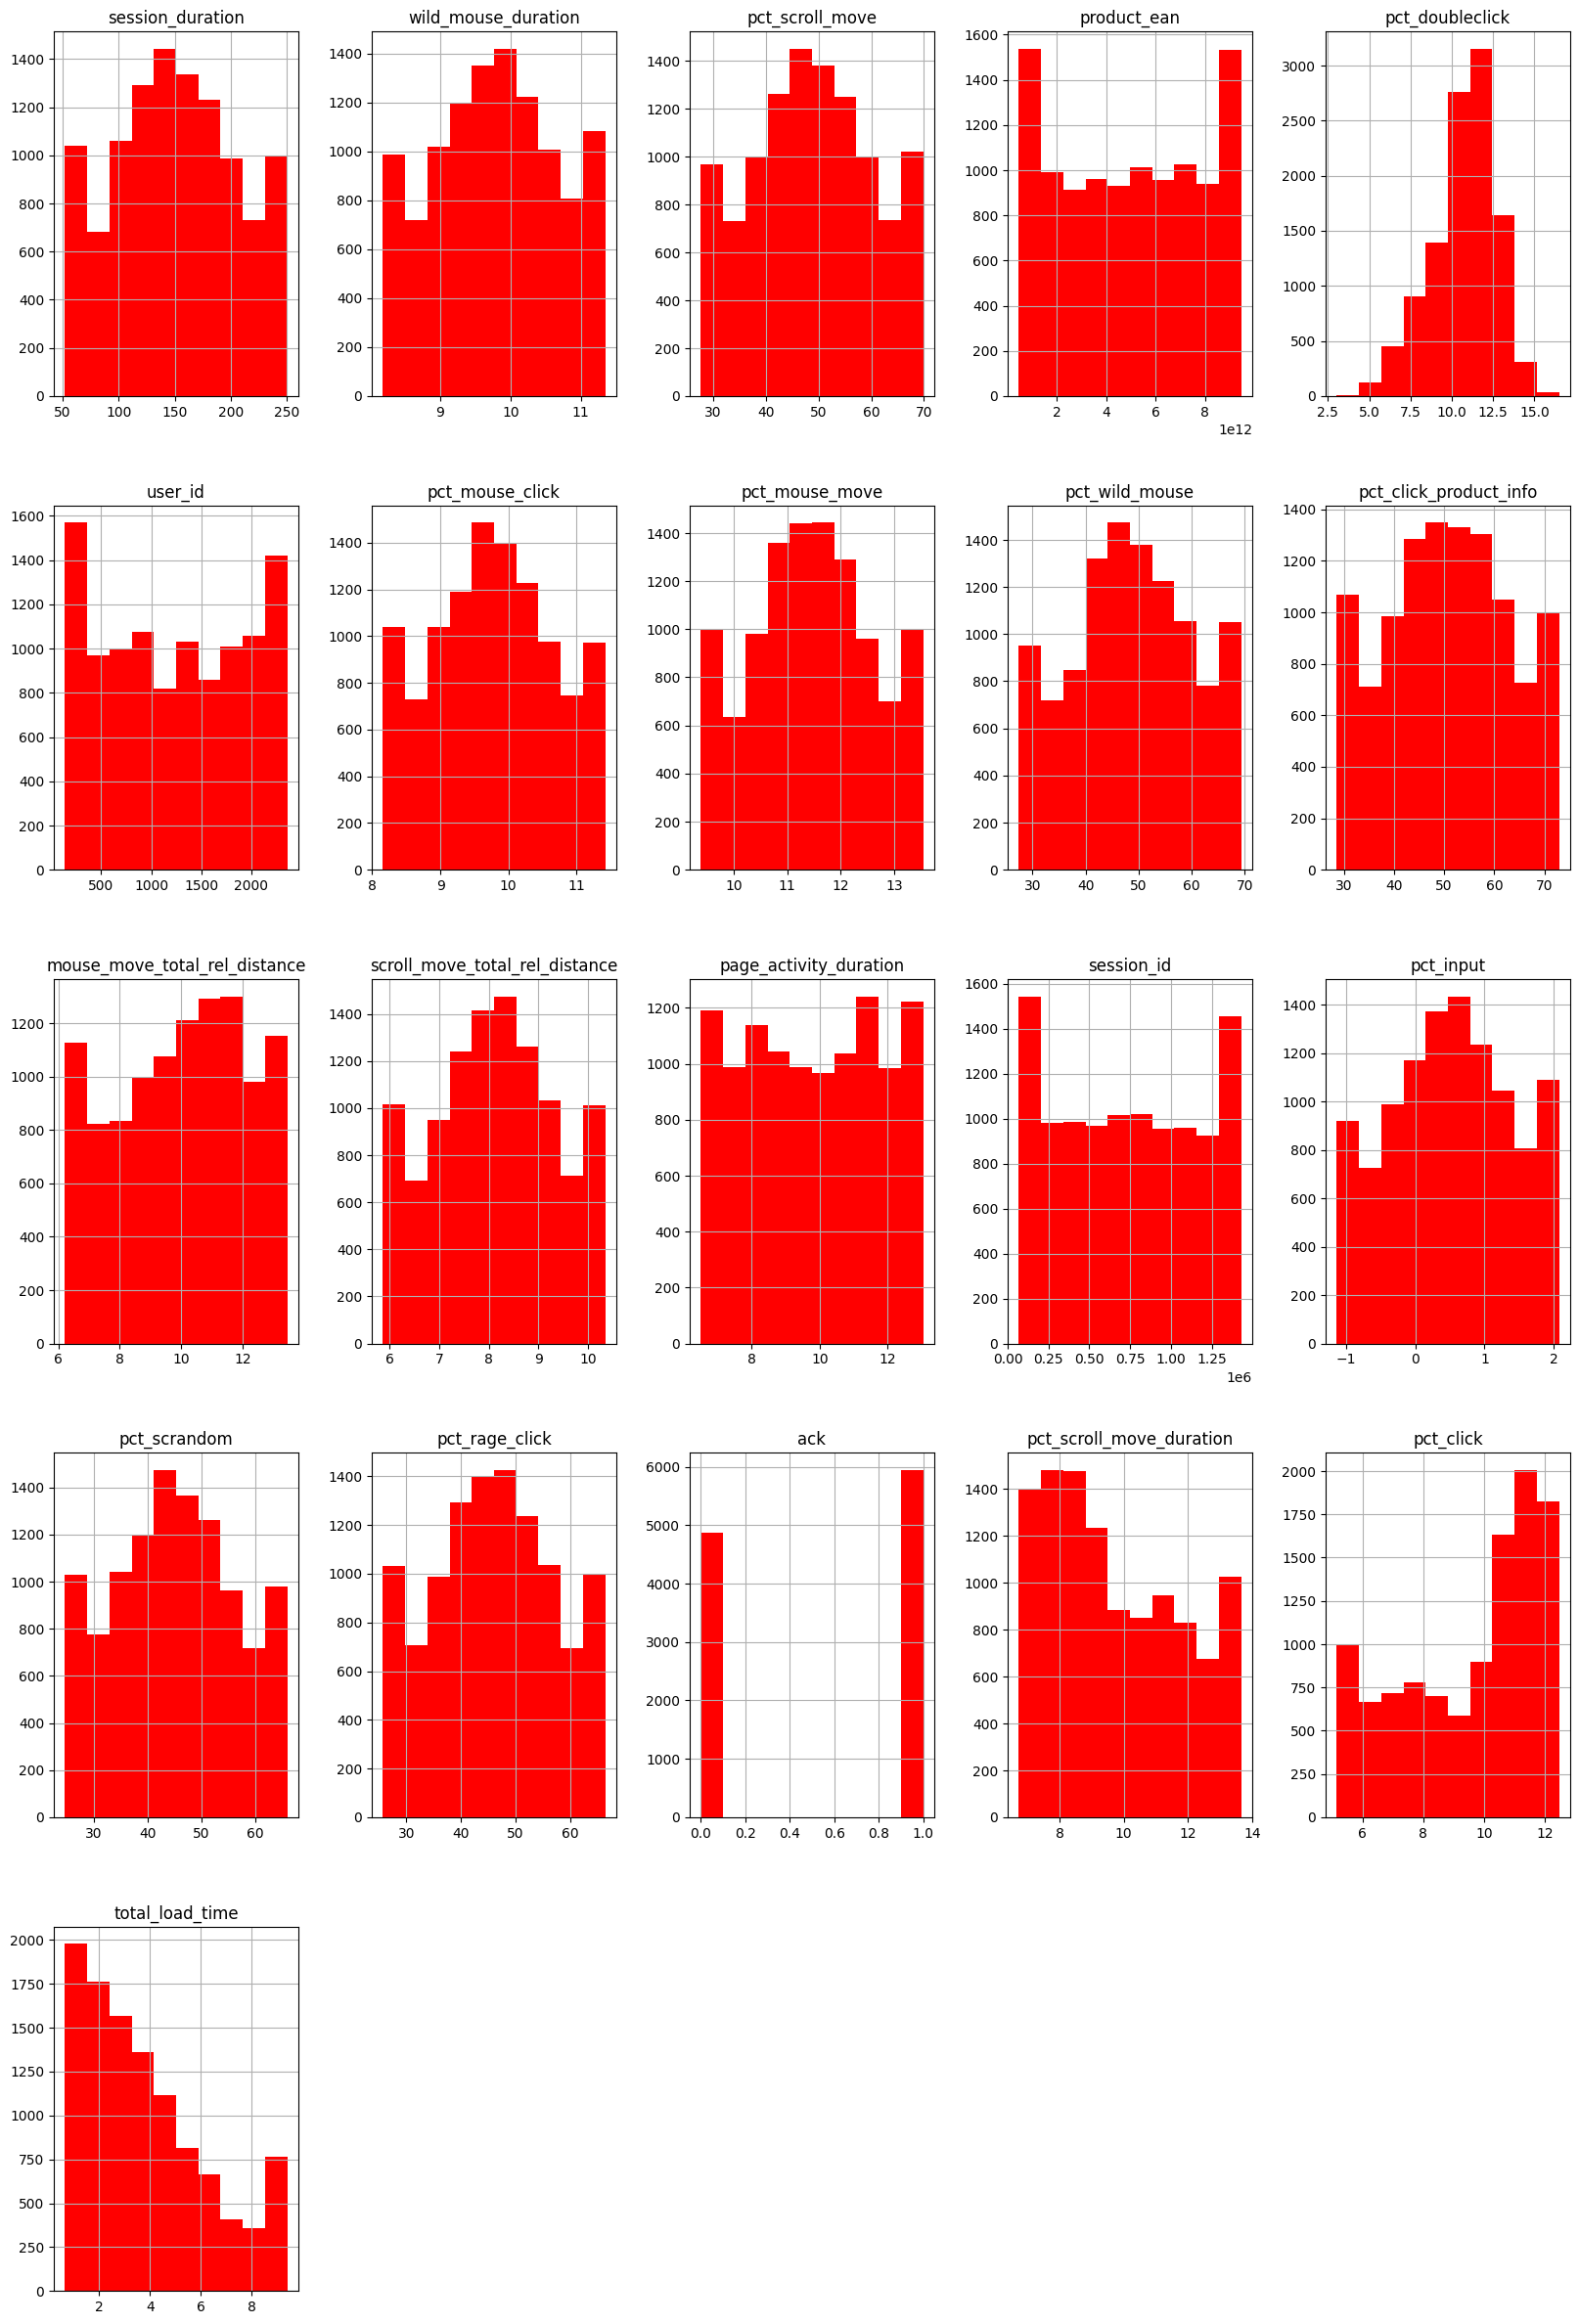

In [40]:
fig = plt.figure(figsize = (20,30))
ax = fig.gca()
merged_data.hist(ax = ax, color="red")